In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the dataset (Make sure train.csv is in your 'data' folder)
df = pd.read_csv('../data/train.csv')

# 2. Filter for the specific features you requested
# We are creating a subset to focus our analysis on your key variables
selected_features = [
    'GrLivArea',   # Size (Above grade (ground) living area square feet)
    'BedroomAbvGr',# Bedrooms
    'FullBath',    # Bathrooms
    'YearBuilt',   # Age (used to calculate age)
    'SalePrice'    # Target Variable
]

df_subset = df[selected_features].copy()

# 3. Quick Check: Do we have missing values?
print("Missing Values:\n", df_subset.isnull().sum())

# 4. Preview the data
df_subset.head()

Missing Values:
 GrLivArea       0
BedroomAbvGr    0
FullBath        0
YearBuilt       0
SalePrice       0
dtype: int64


,GrLivArea,BedroomAbvGr,FullBath,YearBuilt,SalePrice
0,1710,3,2,2003,208500
1,1262,3,2,1976,181500
2,1786,3,2,2001,223500
3,1717,3,1,1915,140000
4,2198,4,2,2000,250000


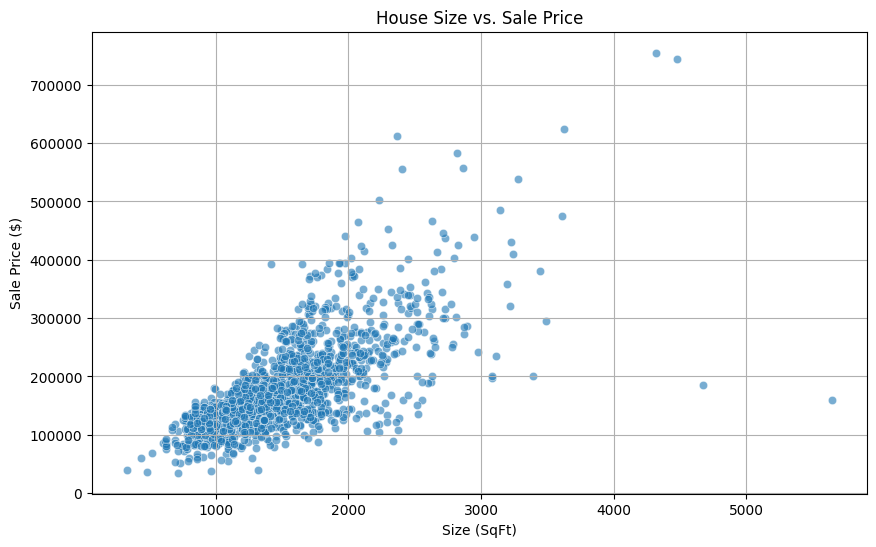

In [3]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df_subset, alpha=0.6)
plt.title('House Size vs. Sale Price')
plt.xlabel('Size (SqFt)')
plt.ylabel('Sale Price ($)')
plt.grid(True)
plt.show()

In [4]:
import pandas as pd
import sys
import os

# Add the 'src' directory to the system path so we can import from it
sys.path.append(os.path.abspath(os.path.join('..', 'src')))

from preprocessing import clean_data, feature_engineer
from model import train_model, evaluate_model

# 1. Load Data
df = pd.read_csv('../data/train.csv')

# 2. Use your "src" functions to clean & engineer
df_clean = clean_data(df)
df_final = feature_engineer(df_clean)

# 3. Select Features for Training
features = ['TotalSF', 'HouseAge', 'TotalBath', 'BedroomAbvGr', 'HasPool']
X = df_final[features]
y = df_final['SalePrice']

# 4. Train & Evaluate
model, X_test, y_test = train_model(X, y, model_type='random_forest')
evaluate_model(model, X_test, y_test)

Model Performance:
RMSE: $36,925.89
R2 Score: 0.8222


(np.float64(36925.893521703525), 0.8222342080968393)

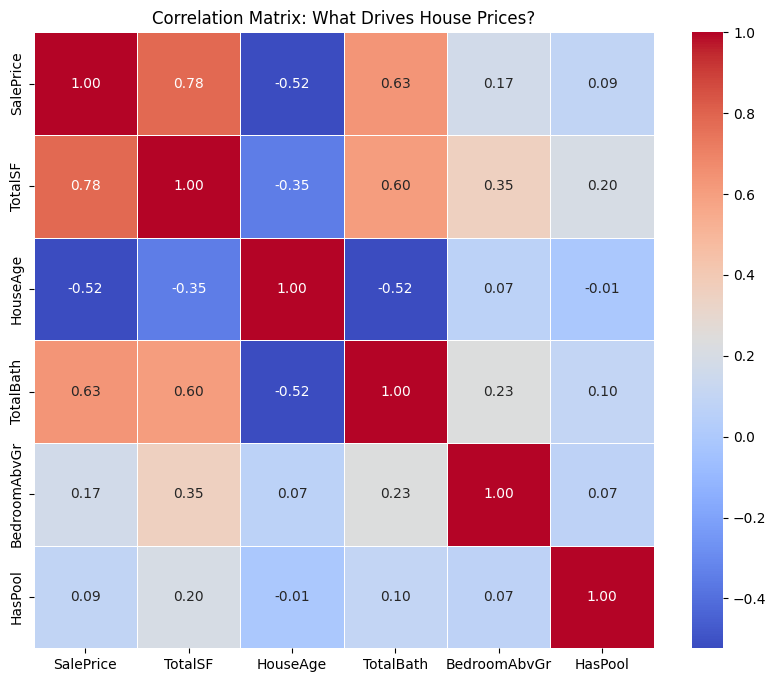

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Combine your features with the Target (Price) for the chart
# We use the 'df_final' you created in the previous step
analysis_df = df_final[['SalePrice', 'TotalSF', 'HouseAge', 'TotalBath', 'BedroomAbvGr', 'HasPool']]

# 2. Calculate Correlation Matrix
corr_matrix = analysis_df.corr()

# 3. Plot Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix: What Drives House Prices?')
plt.show()

In [6]:
import joblib


joblib.dump(model, 'house_price_model.pkl')

print("Model saved successfully as 'house_price_model.pkl'")

Model saved successfully as 'house_price_model.pkl'
